# Iris - Decision tree with pyTorch

In this notebook we will be using pytorch to implement the Iris classification Model


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Iris dataset


In [3]:
iris = load_iris()
X = iris.data
y = iris.target

feature_names = iris.feature_names
class_names = iris.target_names

print("X shape:", X.shape)
print("Classes:", class_names)

X shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']


# Train/Test split (stratified)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (120, 4) Test: (30, 4)


# Train a baseline Decision Tree


In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Visualize the tree


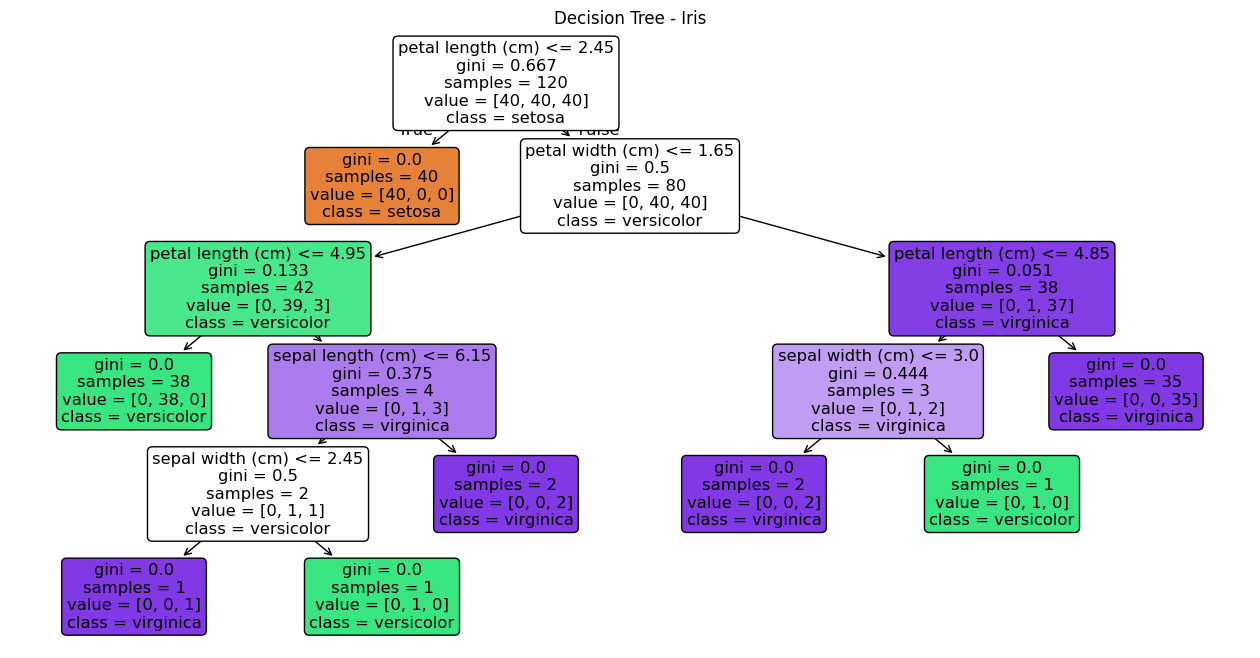

In [7]:
plt.figure(figsize=(16, 8))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree - Iris")
plt.show()

# Tune max_depth


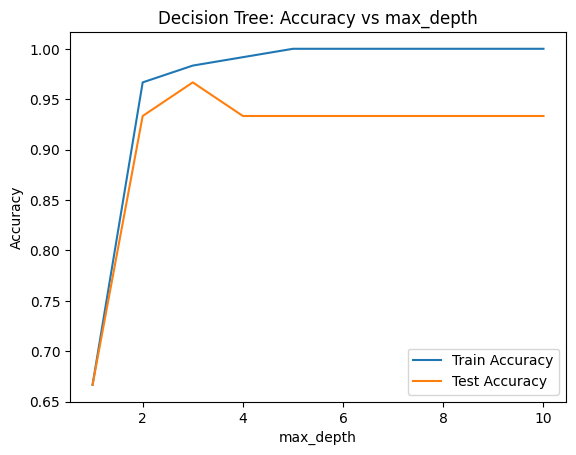

Best depth (by test accuracy): 3


In [8]:
depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure()
plt.plot(list(depths), train_acc, label="Train Accuracy")
plt.plot(list(depths), test_acc, label="Test Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Accuracy vs max_depth")
plt.legend()
plt.show()

best_depth = list(depths)[int(np.argmax(test_acc))]
print("Best depth (by test accuracy):", best_depth)

# Train final model with best depth + visualize again


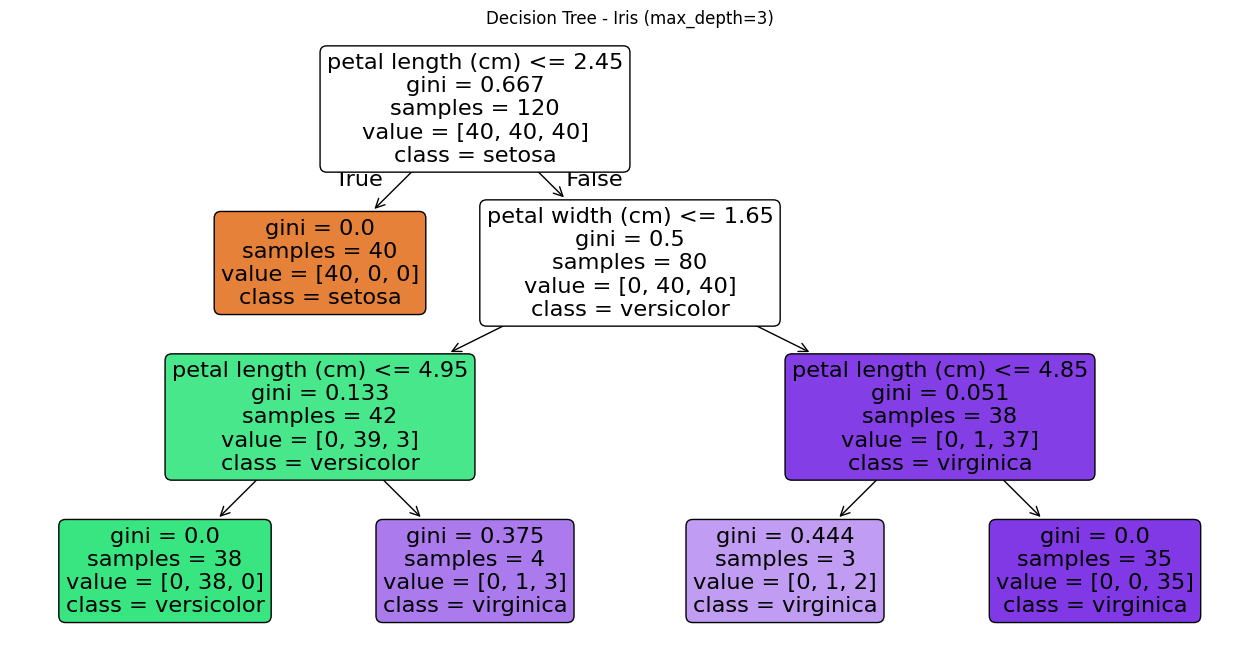

Final Test Accuracy: 0.9666666666666667


In [9]:
final_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_clf.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
plot_tree(
    final_clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.title(f"Decision Tree - Iris (max_depth={best_depth})")
plt.show()

print("Final Test Accuracy:", accuracy_score(y_test, final_clf.predict(X_test)))